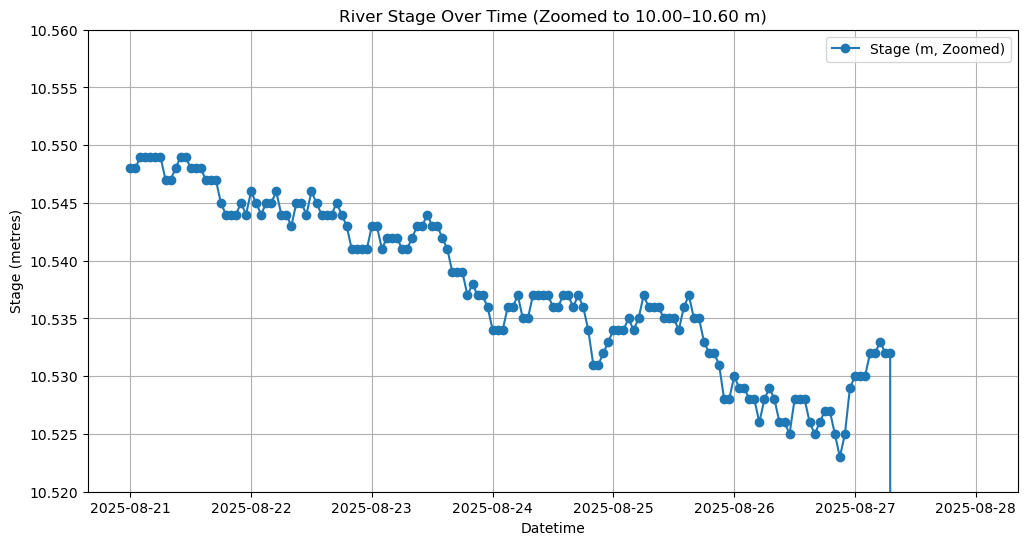

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Load ----------
# Be robust to extra spaces around commas
df = pd.read_csv("601001.ZIPSTAGE.txt", header=None, sep=r"\s*,\s*", engine="python")
df.columns = ["SiteID", "VarFrom", "VarTo", "Time", "Date", "Stage", "Discharge"]

# ---------- Clean ----------
# Combine Date & Time
df["Datetime"] = pd.to_datetime(df["Date"].astype(str).str.strip() + " " +
                                df["Time"].astype(str).str.strip(), dayfirst=True)
df = df.set_index("Datetime").sort_index()

# Strip any non-numeric chars (e.g. trailing 'P') before numeric conversion
for col in ["Stage", "Discharge"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[^0-9\.\-]", "", regex=True)   # keep digits, dot, minus
        .replace({"": None})
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Optional: drop obvious outliers (keep central 1%–99%)
stage_p01, stage_p99 = df["Stage"].quantile([0.01, 0.99])
df_clean = df[(df["Stage"] >= stage_p01) & (df["Stage"] <= stage_p99)].copy()

# Use robust limits from the cleaned data
ymin = df_clean["Stage"].min()
ymax = df_clean["Stage"].max()
pad = max((ymax - ymin) * 0.1, 0.002)   # small padding; at least 2 mm

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Stage"], marker="o", label="Stage (m, Zoomed)")
plt.ylim(10.52, 10.550) 
plt.ylabel("Stage (metres)")
plt.xlabel("Datetime")
plt.title("River Stage Over Time (Zoomed to 10.00–10.60 m)")
plt.legend()
plt.grid(True)
plt.show()

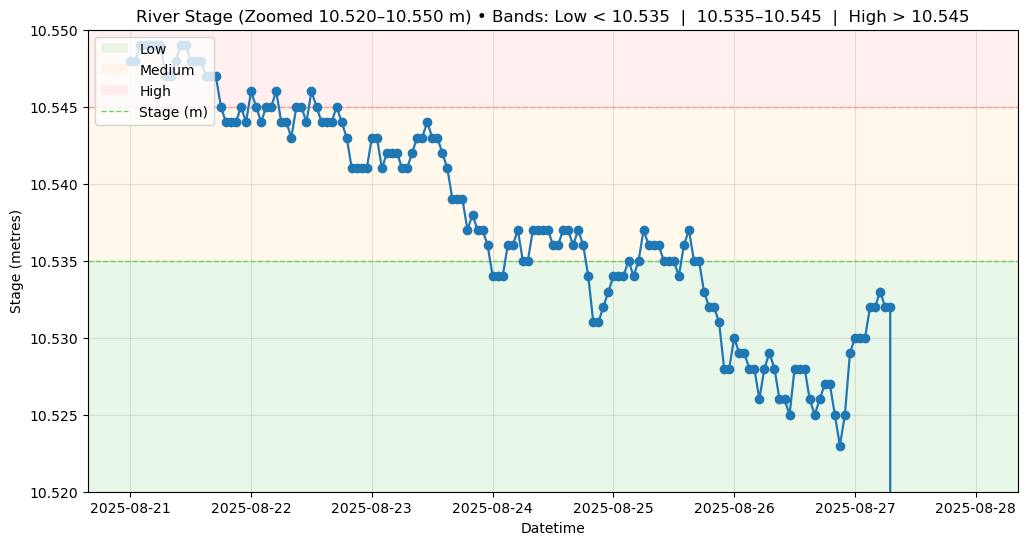

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df = pd.read_csv("601001.ZIPSTAGE.txt", header=None, sep=r"\s*,\s*", engine="python")
df.columns = ["SiteID", "VarFrom", "VarTo", "Time", "Date", "Stage", "Discharge"]


df["Datetime"] = pd.to_datetime(df["Date"].astype(str).str.strip() + " " +
                                df["Time"].astype(str).str.strip(), dayfirst=True)
df = df.set_index("Datetime").sort_index()

for col in ["Stage", "Discharge"]:
    df[col] = (
        df[col].astype(str)
        .str.replace(r"[^0-9\.\-]", "", regex=True)   
        .replace({"": None})
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")


stage_p01, stage_p99 = df["Stage"].quantile([0.01, 0.99])
df_clean = df[(df["Stage"] >= stage_p01) & (df["Stage"] <= stage_p99)].copy()


low_th, high_th = 10.535, 10.545   

y_lower, y_upper = 10.520, 10.550   

fig, ax = plt.subplots(figsize=(12,6))


ax.axhspan(y_lower, low_th,   alpha=0.15, color="#6CCF6C")  # Low
ax.axhspan(low_th, high_th,   alpha=0.15, color="#FFD27F")  # Medium
ax.axhspan(high_th, y_upper,  alpha=0.15, color="#FF9A9A")  # High


ax.axhline(low_th,  color="#6CCF6C", linestyle="--", linewidth=1)
ax.axhline(high_th, color="#FF9A9A", linestyle="--", linewidth=1)


ax.plot(df.index, df["Stage"], marker="o", linewidth=1.6, label="Stage (m)")


ax.set_ylim(y_lower, y_upper)
ax.set_ylabel("Stage (metres)")
ax.set_xlabel("Datetime")
ax.set_title(f"River Stage (Zoomed 10.520–10.550 m) • "
             f"Bands: Low < {low_th:.3f}  |  {low_th:.3f}–{high_th:.3f}  |  High > {high_th:.3f}")
ax.grid(True, alpha=0.35)


handles = [
    Patch(facecolor="#6CCF6C", alpha=0.15, label=f"Low  (< {low_th:.3f} m)"),
    Patch(facecolor="#FFD27F", alpha=0.15, label=f"Medium ({low_th:.3f}–{high_th:.3f} m)"),
    Patch(facecolor="#FF9A9A", alpha=0.15, label=f"High (> {high_th:.3f} m)")
]
line = ax.get_lines()[0]
ax.legend(handles + [line], ["Low", "Medium", "High", "Stage (m)"], loc="upper left")

plt.show()